In [ ]:
pip install matplotlib

In [ ]:
pip install imageio

In [1]:
import hashlib
import PIL
from imageio import imread
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time
import numpy as np

In [2]:
from hashlib import md5

In [3]:
def file_hash(filepath):
  with open(filepath, 'rb') as f:
    return md5(f.read()).hexdigest()

In [5]:
import os

In [6]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
os.getcwd()

In [19]:
data_path = '/content/drive/My Drive/Colab Notebooks/data/faces_recog/'

In [22]:
os.chdir(data_path)

In [57]:
files_list = os.listdir()
print(len(files_list))

110


In [51]:
def file_selector(folder_path):
    filenames = []
    for image in os.listdir(folder_path):
        if image[-3:] == 'jpg' or image[-3:] == 'png' or image[-4:] == 'jpeg' or image[-3:] == 'JPG' or image[-3:] == 'PNG' or image[-4:] == 'JPEG':
            filenames.append(os.path.abspath(folder_path + "/" + image))
    return filenames

In [52]:
len(file_selector(data_path))

118

In [53]:
duplicates = []
hash_keys = dict()
for index, filename in enumerate(file_selector(data_path)): #listdir('.') 
  if os.path.isfile(filename):
    with open(filename,'rb') as  f:
      filehash = hashlib.md5(f.read()).hexdigest()
    if filehash not in hash_keys:
      hash_keys[filehash] = index
    else:
      duplicates.append((filename,index,hash_keys[filehash]))

In [54]:
duplicates

[(52, 8),
 (86, 85),
 (108, 22),
 (109, 104),
 (110, 106),
 (111, 105),
 (116, 18),
 (117, 85)]

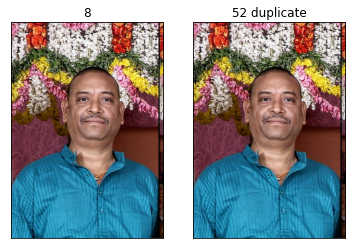

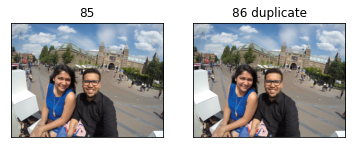

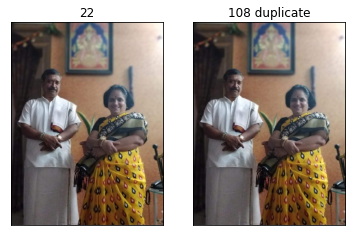

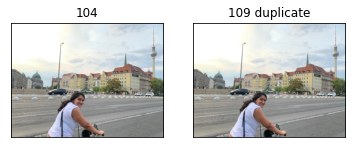

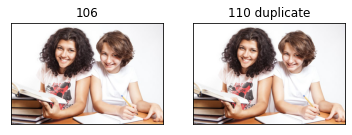

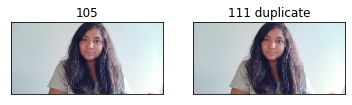

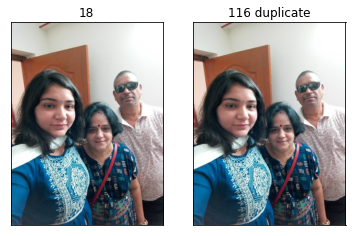

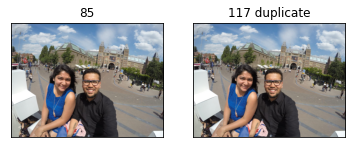

In [55]:
for file_indexes in duplicates[:30]:
  try:
    plt.subplot(121),plt.imshow(imread(files_list[file_indexes[1]]))
    plt.title(file_indexes[1]),plt.xticks([]),plt.yticks([])
    plt.subplot(122),plt.imshow(imread(files_list[file_indexes[0]]))
    plt.title(str(file_indexes[0]) + ' duplicate'), plt.xticks([]),plt.yticks([])
    plt.show()
  except OSError as e:
    continue


In [56]:
for index in duplicates:
  os.remove(files_list[index[0]])